In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.feature_selection import RFECV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

Variables such as age, sex, education, and marital status can provide insights into how different demographics may influence payment behaviors.
Features like credit limit, payment amounts, and repayment status over several months are essential for understanding the financial habits of clients.
The target variable indicates whether a client defaulted on their payment the following month, which serves as the focal point for prediction.

In [3]:
df = pd.read_csv("UCI_Credit_Card.csv")

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

There is a significant imbalance in the default payment distribution, with a larger proportion of clients not defaulting.
Clients who default tend to have lower credit limits on average compared to non-defaulters.
Younger clients appear to be more prone to defaulting on payments.
The gender distribution shows that both males and females have a considerable number of defaults, but further analysis may be needed.
Education level and marriage status do not show a clear trend in default payment behavior, indicating other factors may play a more significant role.
Payment statuses over the past months reveal that consistent late payments correlate with defaulting.

For this binary classification problem, appropriate metrics for assessment could include:
Accuracy
F1-Score (as this includes both recall and precision)
ROC-AUC

In [5]:
summary_statistics = train_df.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
                  ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  21000.000000    21000.000000  21000.000000  21000.000000  21000.000000   
mean   14962.348238   167880.651429      1.600762      1.852143      1.554000   
std     8650.734050   130202.682167      0.489753      0.792961      0.521675   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7498.750000    50000.000000      1.000000      1.000000      1.000000   
50%    14960.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22458.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      35.500810     -0.015429     -0.137095     -0.171619     -0.225238   
std        9

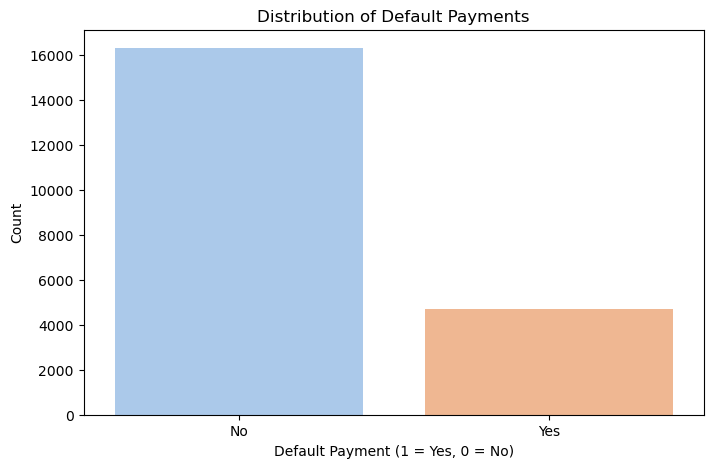

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='default.payment.next.month', hue='default.payment.next.month', data=train_df, palette='pastel', legend=False)
plt.title('Distribution of Default Payments')
plt.xlabel('Default Payment (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

/var/folders/p0/ddg_z7lj6j99wdv48qsy8l4w0000gn/T/ipykernel_10025/2164601766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=train_df, palette='pastel')


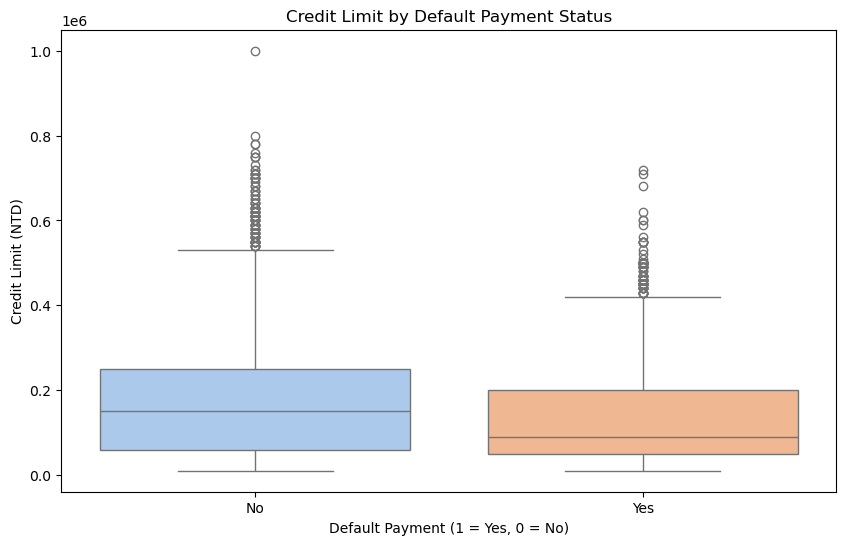

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=train_df, palette='pastel')
plt.title('Credit Limit by Default Payment Status')
plt.xlabel('Default Payment (1 = Yes, 0 = No)')
plt.ylabel('Credit Limit (NTD)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

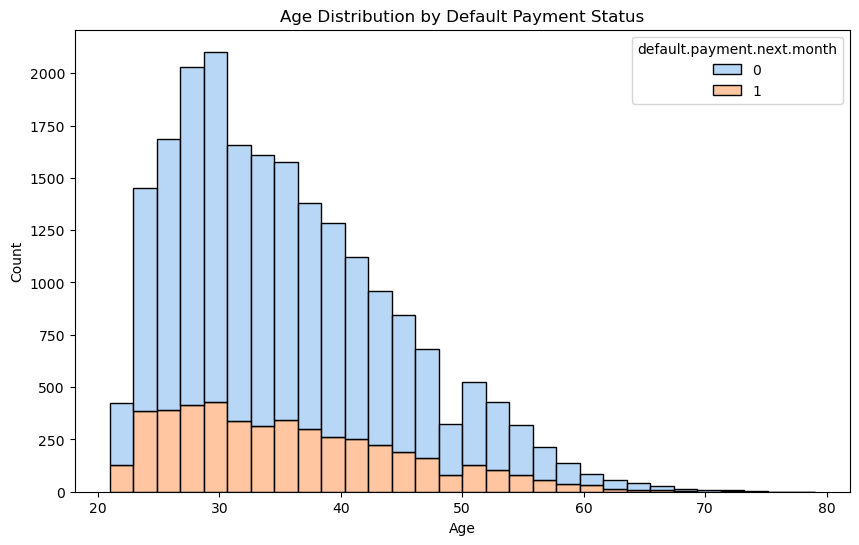

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='AGE', hue='default.payment.next.month', multiple='stack', bins=30, palette='pastel')
plt.title('Age Distribution by Default Payment Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

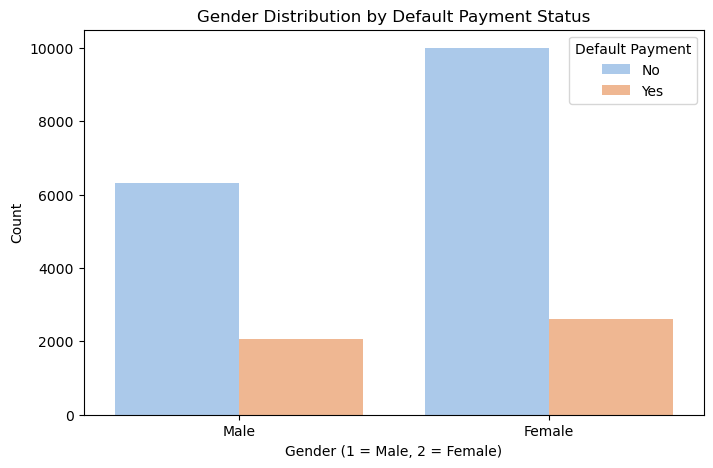

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='SEX', hue='default.payment.next.month', data=train_df, palette='pastel')
plt.title('Gender Distribution by Default Payment Status')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.show()

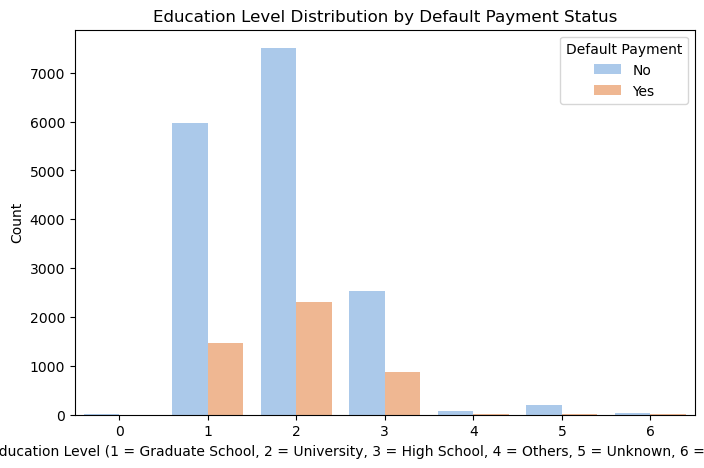

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=train_df, palette='pastel')
plt.title('Education Level Distribution by Default Payment Status')
plt.xlabel('Education Level (1 = Graduate School, 2 = University, 3 = High School, 4 = Others, 5 = Unknown, 6 = Unknown)')
plt.ylabel('Count')
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.show()

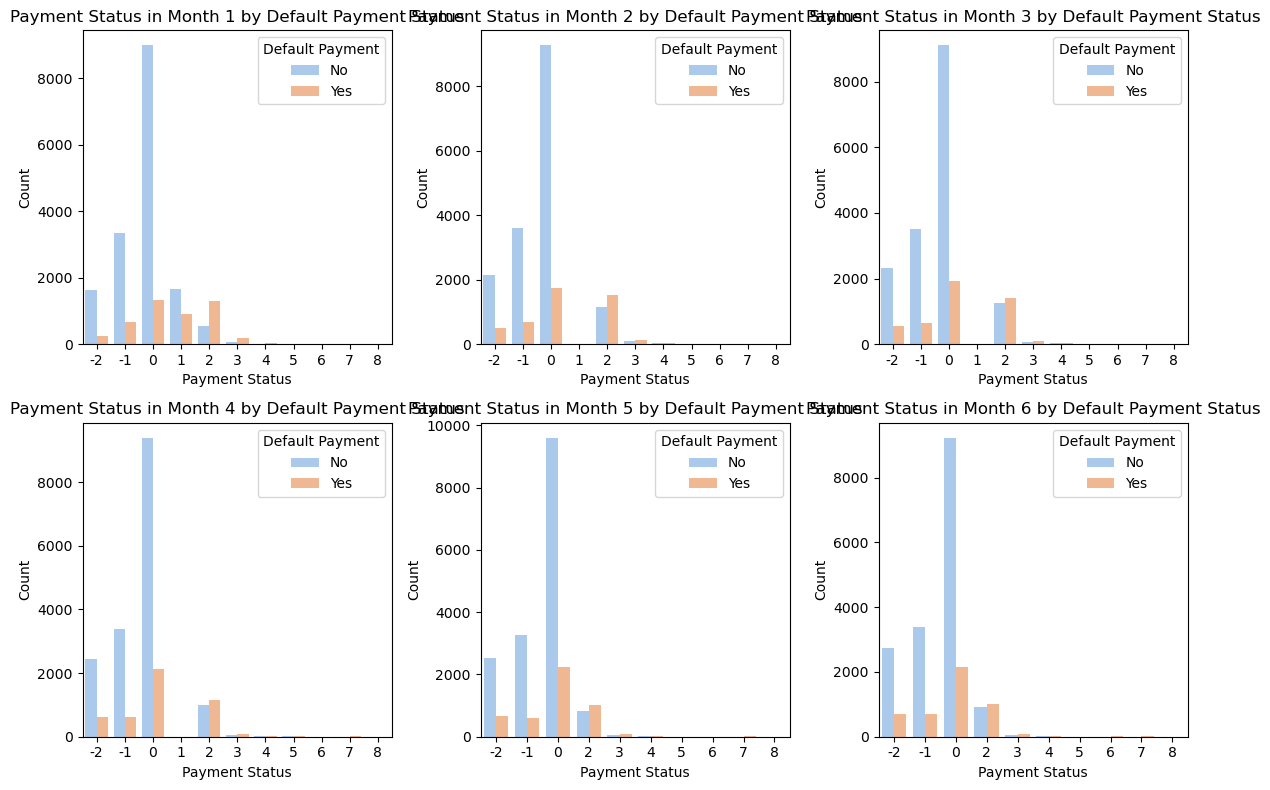

In [11]:
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(12, 8))
for i, col in enumerate(payment_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='default.payment.next.month', data=train_df, palette='pastel')
    plt.title(f'Payment Status in Month {i} by Default Payment Status')
    plt.xlabel('Payment Status')
    plt.ylabel('Count')
    plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

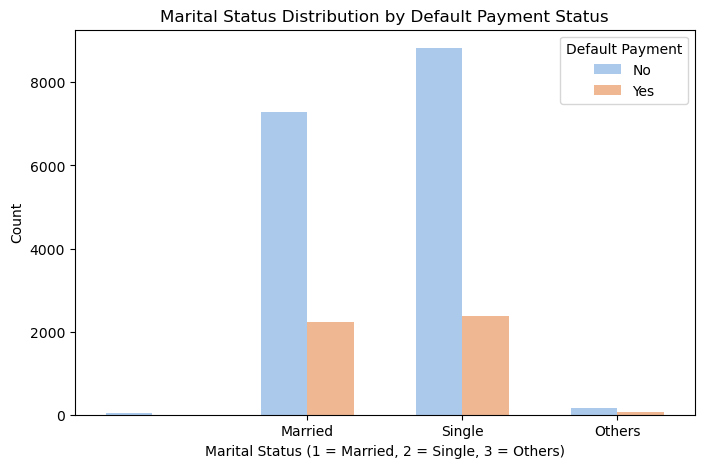

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=train_df, 
              palette='pastel', width=0.6)  # Adjust bar width here
plt.title('Marital Status Distribution by Default Payment Status')
plt.xlabel('Marital Status (1 = Married, 2 = Single, 3 = Others)')
plt.ylabel('Count')
plt.xticks(ticks=[1, 2, 3], labels=['Married', 'Single', 'Others'])
plt.legend(title='Default Payment', labels=['No', 'Yes'])
plt.show()


In [13]:
...

Ellipsis

In [14]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [15]:
# 1. Total Payments: Sum of the last six payments
train_df['TOTAL_PAYMENTS'] = (train_df['PAY_AMT1'] + train_df['PAY_AMT2'] +
                              train_df['PAY_AMT3'] + train_df['PAY_AMT4'] +
                              train_df['PAY_AMT5'] + train_df['PAY_AMT6'])

test_df['TOTAL_PAYMENTS'] = (test_df['PAY_AMT1'] + test_df['PAY_AMT2'] +
                             test_df['PAY_AMT3'] + test_df['PAY_AMT4'] +
                             test_df['PAY_AMT5'] + test_df['PAY_AMT6'])

# 2. Average Bill Amount: Average of the last six bill amounts
train_df['AVG_BILL_AMOUNT'] = (train_df['BILL_AMT1'] + train_df['BILL_AMT2'] +
                                train_df['BILL_AMT3'] + train_df['BILL_AMT4'] +
                                train_df['BILL_AMT5'] + train_df['BILL_AMT6']) / 6
test_df['AVG_BILL_AMOUNT'] = (test_df['BILL_AMT1'] + test_df['BILL_AMT2'] +
                               test_df['BILL_AMT3'] + test_df['BILL_AMT4'] +
                               test_df['BILL_AMT5'] + test_df['BILL_AMT6']) / 6

# 3. Maximum Payment Delay: Maximum value in the PAY columns
train_df['MAX_PAYMENT_DELAY'] = train_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)
test_df['MAX_PAYMENT_DELAY'] = test_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)

# 4. Credit Utilization Ratio: Total Bill Amount / LIMIT_BAL
train_df['CREDIT_UTILIZATION'] = train_df['TOTAL_PAYMENTS'] / train_df['LIMIT_BAL']
test_df['CREDIT_UTILIZATION'] = test_df['TOTAL_PAYMENTS'] / test_df['LIMIT_BAL']

# 5. Payment Trend: Indicates if the total payments are increasing or decreasing
train_df['PAYMENT_TREND'] = np.where(train_df['TOTAL_PAYMENTS'] > train_df['TOTAL_PAYMENTS'].shift(1), 1, 0)
test_df['PAYMENT_TREND'] = np.where(test_df['TOTAL_PAYMENTS'] > test_df['TOTAL_PAYMENTS'].shift(1), 1, 0)

print(train_df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'TOTAL_PAYMENTS', 'AVG_BILL_AMOUNT',
       'MAX_PAYMENT_DELAY', 'CREDIT_UTILIZATION', 'PAYMENT_TREND'],
      dtype='object')


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [16]:
numerical_features = ['LIMIT_BAL', 'AGE', 'TOTAL_PAYMENTS', 
                      'AVG_BILL_AMOUNT', 'MAX_PAYMENT_DELAY', 
                      'CREDIT_UTILIZATION']

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

ordinal_features = ['PAYMENT_TREND']

drop_columns = ['ID','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
train_df = train_df.drop(columns = drop_columns)
test_df = test_df.drop(columns = drop_columns)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  
        ('cat', OneHotEncoder(), categorical_features),
        ('ord',OrdinalEncoder(),ordinal_features)
    ],
    remainder='passthrough'
)


X_train = train_df.drop('default.payment.next.month', axis=1)
y_train = train_df['default.payment.next.month']

X_test = test_df.drop('default.payment.next.month', axis=1)
y_test = test_df['default.payment.next.month']

['num__LIMIT_BAL' 'num__AGE' 'num__TOTAL_PAYMENTS' 'num__AVG_BILL_AMOUNT'
 'num__MAX_PAYMENT_DELAY' 'num__CREDIT_UTILIZATION' 'cat__SEX_1'
 'cat__SEX_2' 'cat__EDUCATION_0' 'cat__EDUCATION_1' 'cat__EDUCATION_2'
 'cat__EDUCATION_3' 'cat__EDUCATION_4' 'cat__EDUCATION_5'
 'cat__EDUCATION_6' 'cat__MARRIAGE_0' 'cat__MARRIAGE_1' 'cat__MARRIAGE_2'
 'cat__MARRIAGE_3' 'ord__PAYMENT_TREND']


In [17]:
...

Ellipsis

In [18]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [21]:
dummy_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DummyClassifier(strategy='most_frequent'))
])

In [40]:
pd.DataFrame(
    cross_validate(dummy_pipeline, X_train, y_train, return_train_score=True)
)

,fit_time,score_time,test_score,train_score
0,0.049995,0.005771,0.776905,0.776726
1,0.013806,0.004744,0.776905,0.776726
2,0.012992,0.004640,0.776667,0.776786
3,0.012903,0.004530,0.776667,0.776786
4,0.012881,0.004576,0.776667,0.776786


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

The optimal regularization strength parameter (C) found during hyperparameter tuning is 10. This parameter controls the trade-off between fitting the training data well and keeping the model simple to avoid overfitting.

The results suggest that the logistic regression model with the tuned parameter C = 10 achieves a good balance between bias and variance. These scores indicate a consistent level of accuracy across different folds, with a mean score around 0.787. This suggests that the model performs fairly well on average. The low variability in cross-validation scores indicates that the model is likely to generalize well on unseen data.

In [41]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Explore a range of C values
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

print(f"Best Parameters: {best_params}")
print(f"Mean Cross-Validation Scores: {mean_scores}")
print(f"Standard Deviation of Scores: {std_scores}")

Best Parameters: {'model__C': 10}
Mean Cross-Validation Scores: [0.782      0.78719048 0.78728571 0.78728571 0.78742857 0.78742857]
Standard Deviation of Scores: [0.00146462 0.00092091 0.00046657 0.00046657 0.00075892 0.00064594]


In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [45]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}
for model_name, model in models.items():
    curr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    results = pd.DataFrame(cross_validate(curr_pipeline, X_train, y_train, return_train_score=True))
    
    print(f"Results for {model_name}:")
    print(results[['fit_time', 'score_time', 'test_score', 'train_score']])
    print("\n")
    

Results for K-Nearest Neighbors:
   fit_time  score_time  test_score  train_score
0  0.077345    0.455662    0.763095     0.833631
1  0.016264    0.144580    0.766905     0.829821
2  0.022879    0.132687    0.775000     0.830714
3  0.018808    0.157061    0.767857     0.832679
4  0.049082    0.306659    0.774762     0.830536


Results for Random Forest:
   fit_time  score_time  test_score  train_score
0  3.260095    0.110911    0.771190     0.999345
1  3.175571    0.113749    0.782857     0.999345
2  3.241704    0.105523    0.786190     0.999286
3  3.257487    0.099988    0.775476     0.999167
4  3.194937    0.116060    0.782143     0.999464


Results for Support Vector Machine:
     fit_time  score_time  test_score  train_score
0  102.547740    4.533328    0.784286     0.794405
1  103.622147    4.556891    0.785476     0.791726
2  115.062864    4.453809    0.785000     0.792560
3  105.150504    4.359643    0.786905     0.791190
4  104.047023    4.349690    0.782381     0.794345




In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

Not a big improvement in scores

In [56]:
rfe_pipe = make_pipeline(
    StandardScaler(),
    RFECV(LogisticRegression(max_iter=2000), cv=10),
    RandomForestClassifier(n_estimators=100, random_state=42),
)

pd.DataFrame(cross_validate(rfe_pipe, X_train, y_train, return_train_score=True)).mean()

fit_time       2.731643
score_time     0.053576
test_score     0.731333
train_score    0.955845
dtype: float64

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

models_and_params = {
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            'model__n_neighbors': [3, 5, 7, 9]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'model__n_estimators': [50, 100, 200],  
            'model__max_depth': [None, 10, 20, 30]
        }
    },
    "Support Vector Machine": {
        "model": SVC(probability=True),
        "params": {
            'model__C': [0.1, 1, 10, 100]
        }
    }
}

for model_name, details in models_and_params.items():
    curr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', details['model'])])
    
    grid_search = GridSearchCV(curr_pipeline, details['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score for {model_name}: {grid_search.best_score_:.2f}")

    random_search = RandomizedSearchCV(curr_pipeline, details['params'], n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    print(f"Best Parameters from RandomizedSearchCV for {model_name}: {random_search.best_params_}")
    print(f"Best Cross-Validation Score from RandomizedSearchCV for {model_name}: {random_search.best_score_:.2f}")
    print("\n")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters from RandomizedSearchCV for K-Nearest Neighbors: {'model__n_neighbors': 9}
Best Cross-Validation Score from RandomizedSearchCV for K-Nearest Neighbors: 0.78


Best Parameters for Random Forest: {'model__max_depth': 10, 'model__n_estimators': 100}
Best Cross-Validation Score for Random Forest: 0.79
Best Parameters from RandomizedSearchCV for Random Forest: {'model__n_estimators': 200, 'model__max_depth': 10}
Best Cross-Validation Score from RandomizedSearchCV for Random Forest: 0.79


Best Parameters for Support Vector Machine: {'model__C': 10}
Best Cross-Validation Score for Support Vector Machine: 0.79


/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [64]:
import shap

random_forest_model = RandomForestClassifier(n_estimators=100)
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestClassifier())])
pipeline_rf.fit(X_train, y_train)

model = pipeline_rf.named_steps['model']

explainer = shap.TreeExplainer(model)

X_test_transformed = pipeline_rf.named_steps['preprocessor'].transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=X_train.columns)

ModuleNotFoundError: No module named 'shap'

In [61]:
...

Ellipsis

In [62]:
...

Ellipsis

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

Given the drop in recall and F1 score, there may be a lack of trust in the model's ability to generalize to unseen data. High accuracy can be misleading, especially in imbalanced datasets where the model might favor the majority class.
The AUC-ROC of 0.76 indicates some level of class separation but isn't high enough to fully validate the model's reliability, especially with poor recall.
If hyperparameter tuning focused primarily on improving accuracy without considering the precision-recall trade-off, the model could have become biased towards predicting the majority class.

In [65]:
best_model = RandomForestClassifier(n_estimators=100, max_depth=10)

best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
best_model_pipeline.fit(X_train, y_train)

test_predictions = best_model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, zero_division=0)
recall = recall_score(y_test, test_predictions, zero_division=0)
f1 = f1_score(y_test, test_predictions, zero_division=0)
y_pred_proba = best_model_pipeline.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")
print(f"Test AUC-ROC: {auc_roc:.2f}")

Test Accuracy: 0.79
Test Precision: 0.58
Test Recall: 0.18
Test F1 Score: 0.28
Test AUC-ROC: 0.76


In [ ]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_transformed)
indices_to_plot = [0, 1] 

for i in indices_to_plot:
    shap.initjs()
    shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test_transformed[i], matplotlib=True)


In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

Implement techniques such as oversampling the minority class (e.g., SMOTE) or undersampling the majority class to balance the dataset better. This can help improve recall and precision. Consider using more sophisticated models such as XGBoost or LightGBM, which can handle imbalanced datasets better and often provide better predictive performance.Explore creating new features based on domain knowledge. For example, aggregating payment histories or creating features that reflect spending patterns could yield additional insights. The final test score is as follows:

Test Accuracy: 0.79
This metric summarizes the overall effectiveness of the model in predicting the target variable on the test dataset.

In [66]:
results_summary = pd.DataFrame({
    "Metric": [
        "Test Accuracy",
        "Test Precision",
        "Test Recall",
        "Test F1 Score",
        "Test AUC-ROC",
        "Best Model"
    ],
    "Value": [
        0.79,
        0.58,
        0.18,
        0.28,
        0.76,
        "Random Forest (with hyperparameter tuning)"
    ]
})

# Display the results summary table
print(results_summary)

           Metric                                       Value
0   Test Accuracy                                        0.79
1  Test Precision                                        0.58
2     Test Recall                                        0.18
3   Test F1 Score                                        0.28
4    Test AUC-ROC                                        0.76
5      Best Model  Random Forest (with hyperparameter tuning)


In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

One of the biggest takeaways from the supervised machine learning material we've covered is the importance of balancing model performance with interpretability and the ethical implications of machine learning.The process of identifying which features are most influential in making predictions is vital. Tools like SHAP and feature importance from tree-based models help in understanding the model’s decision-making process. This not only aids in model refinement but also enhances transparency, allowing stakeholders to trust the model’s predictions.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)